In [ ]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
t1_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*t1.nii'))
t2_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*seg.nii'))

In [ ]:
for img in range(len(t1_list)):
    print("Now preparing image and masks number: ", img)

    temp_image_t1=nib.load(t1_list[img]).get_fdata()
    temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
    temp_image_t1=temp_image_t1[56:184, 56:184, 13:141]
   

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    temp_image_t2=temp_image_t2[56:184, 56:184, 13:141]
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
    temp_image_t1ce=temp_image_t1ce[56:184, 56:184, 13:141]
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    temp_image_flair=temp_image_flair[56:184, 56:184, 13:141]

        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    print(np.unique(temp_mask))
    
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_mask= to_categorical(temp_mask, num_classes=4)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/t1/images/image_'+str(img)+'.npy', temp_image_t1)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/t1ce/images/image_'+str(img)+'.npy', temp_image_t1ce)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/t2/images/image_'+str(img)+'.npy', temp_image_t2)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/flair/images/image_'+str(img)+'.npy', temp_image_flair)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/t2/masks/mask_'+str(img)+'.npy', temp_mask) 
   
     

In [ ]:
import glob
mask_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*seg.nii'))

In [ ]:
import nibabel as nib
import numpy as np
for img in range(len(mask_list)):
    print("Now preparing masks number: ", img)

    

        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    print(np.unique(temp_mask))
    
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    #temp_mask= to_categorical(temp_mask, num_classes=4)
   
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/masks3D/mask_'+str(img)+'.npy', temp_mask) 

In [ ]:
import os
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from skimage.io import imread,imshow
from skimage.transform import resize
import os


#################################
IMG_ROW=IMG_COL=128
IMG_CHANNEL=3
IMG_ROW=IMG_COL=64
IMG_CHANNEL=3
TRAIN_IMG_DIR="/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/masks3D/"

imgarray=[]
maskarray=[]

list_1=os.listdir(TRAIN_IMG_DIR)


import os  
for path in list_1:
    #print(i)
    
    print("done",path)
        #extension = os.path.splitext(path)[0]
        #extension=extension+'.png'
    img=np.load(TRAIN_IMG_DIR+path)
        
        #img,mask=get_img_mask_array(TRAIN_IMG_DIR+path,TRAIN_MASK_DIR)
    imgarray.append(img)
        #maskarray.append(mask)
    print(np.asarray(imgarray).shape)
        #print(np.asarray(imgarray).shape)
    #print(np.asarray(maskarray).shape)
imgarray=np.asarray(imgarray)
np.save(r'/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/masks3D/mask_list.npy', imgarray)

In [ ]:
imgarray.shape

(210, 128, 128, 128)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
imgarray=np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/t1/image_t1_list.npy')
maskarray=np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/masks3D/mask_list.npy')

In [ ]:
imgarray = imgarray[:,:,:,0:16]
maskarray = maskarray[:,:,:,0:16]

In [ ]:
x_train1,x_test,y_train1,y_test=train_test_split(imgarray, maskarray, test_size = 0.20, random_state = 101)

In [ ]:
x_train1.shape, x_test.shape

((168, 128, 128, 16), (42, 128, 128, 16))

In [ ]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))



In [ ]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))



In [ ]:
!pip install keras_applications
!pip install classification-models-3D
!pip install efficientnet-3D
!pip install segmentation-models-3D

     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 


In [ ]:
import numpy as np


########################
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape
from keras.layers import BatchNormalization
import tensorflow as tf
from torch.nn import MaxUnpool3d
from keras.layers import Conv3D, MaxPooling3D, concatenate, UpSampling3D


def segnet(
        input_shape,
        n_labels,
        kernel=3,
        pool_size=(2, 2, 2),
        output_mode="softmax"):
    # encoder
    inputs = Input(shape=input_shape)

    conv_1 = Conv3D(64, (kernel, kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_2 = Conv3D(64, (kernel, kernel, kernel), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)

    pool_1= MaxPooling3D(pool_size)(conv_2)

    conv_3 = Conv3D(128, (kernel, kernel, kernel), padding="same")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_4 = Conv3D(128, (kernel, kernel, kernel), padding="same")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2 = MaxPooling3D(pool_size)(conv_4)

    conv_5 = Conv3D(256, (kernel, kernel, kernel), padding="same")(pool_2)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)
    conv_6 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_5)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)
    conv_7 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_6)
    conv_7 = BatchNormalization()(conv_7)
    conv_7 = Activation("relu")(conv_7)

    pool_3 = MaxPooling3D(pool_size)(conv_7)

    conv_8 = Conv3D(512, (kernel, kernel, kernel), padding="same")(pool_3)
    conv_8 = BatchNormalization()(conv_8)
    conv_8 = Activation("relu")(conv_8)
    conv_9 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_8)
    conv_9 = BatchNormalization()(conv_9)
    conv_9 = Activation("relu")(conv_9)
    conv_10 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_9)
    conv_10 = BatchNormalization()(conv_10)
    conv_10 = Activation("relu")(conv_10)

    pool_4 = MaxPooling3D(pool_size)(conv_10)

    conv_11 = Conv3D(512, (kernel, kernel, kernel), padding="same")(pool_4)
    conv_11 = BatchNormalization()(conv_11)
    conv_11 = Activation("relu")(conv_11)
    conv_12 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_11)
    conv_12 = BatchNormalization()(conv_12)
    conv_12 = Activation("relu")(conv_12)
    conv_13 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_12)
    conv_13 = BatchNormalization()(conv_13)
    conv_13 = Activation("relu")(conv_13)

    pool_5 = MaxPooling3D(pool_size)(conv_13)
    print("Build enceder done..")

    # decoder

    unpool_1 = UpSampling3D(pool_size)(pool_5)

    conv_14 = Conv3D(512, (kernel, kernel, kernel), padding="same")(unpool_1)
    conv_14 = BatchNormalization()(conv_14)
    conv_14 = Activation("relu")(conv_14)
    conv_15 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_14)
    conv_15 = BatchNormalization()(conv_15)
    conv_15 = Activation("relu")(conv_15)
    conv_16 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_15)
    conv_16 = BatchNormalization()(conv_16)
    conv_16 = Activation("relu")(conv_16)

    unpool_2 = UpSampling3D(pool_size)(conv_16)

    conv_17 = Conv3D(512, (kernel, kernel, kernel), padding="same")(unpool_2)
    conv_17 = BatchNormalization()(conv_17)
    conv_17 = Activation("relu")(conv_17)
    conv_18 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_17)
    conv_18 = BatchNormalization()(conv_18)
    conv_18 = Activation("relu")(conv_18)
    conv_19 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_18)
    conv_19 = BatchNormalization()(conv_19)
    conv_19 = Activation("relu")(conv_19)

    unpool_3 = UpSampling3D(pool_size)(conv_19)

    conv_20 = Conv3D(256, (kernel, kernel, kernel), padding="same")(unpool_3)
    conv_20 = BatchNormalization()(conv_20)
    conv_20 = Activation("relu")(conv_20)
    conv_21 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_20)
    conv_21 = BatchNormalization()(conv_21)
    conv_21 = Activation("relu")(conv_21)
    conv_22 = Conv3D(128, (kernel, kernel, kernel), padding="same")(conv_21)
    conv_22 = BatchNormalization()(conv_22)
    conv_22 = Activation("relu")(conv_22)

    unpool_4 = UpSampling3D(pool_size)(conv_22)

    conv_23 = Conv3D(128, (kernel, kernel, kernel), padding="same")(unpool_4)
    conv_23 = BatchNormalization()(conv_23)
    conv_23 = Activation("relu")(conv_23)
    conv_24 = Conv3D(64, (kernel, kernel, kernel), padding="same")(conv_23)
    conv_24 = BatchNormalization()(conv_24)
    conv_24 = Activation("relu")(conv_24)

    unpool_5 = UpSampling3D(pool_size)(conv_24)

    conv_25 = Conv3D(64, (kernel, kernel, kernel), padding="same")(unpool_5)
    conv_25 = BatchNormalization()(conv_25)
    conv_25 = Activation("relu")(conv_25)

    conv_26 = Conv3D(n_labels, (1, 1, 1), padding="valid")(conv_25)
    conv_26 = BatchNormalization()(conv_26)
    '''conv_26 = Reshape(
            (input_shape[0]*input_shape[1], n_labels),
            input_shape=(input_shape[0], input_shape[1], n_labels))(conv_26)'''

    outputs = Activation(output_mode)(conv_26)
    print("Build decoder done..")

    model = Model(inputs=inputs, outputs=outputs, name="SegNet")

    return model



model = segnet(input_shape=(168, 128, 128, 16), n_labels=4)

model.summary()
print(model.input_shape)
print(model.output_shape)

Build enceder done..
Build decoder done..
Model: "SegNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 168, 128, 128, 16 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 168, 128, 128, 64) 27712     
_________________________________________________________________
batch_normalization (BatchNo (None, 168, 128, 128, 64) 256       
_________________________________________________________________
activation (Activation)      (None, 168, 128, 128, 64) 0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 168, 128, 128, 64) 110656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 168, 128, 128, 64) 256       
_________________________________________________________________
activation_1 (Acti

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
def segnet():#,savename):

    # Encoding layer
    img_input = Input(shape= (128,128,16))
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name='fc1')(x)
    x = Dense(1024, activation = 'relu', name='fc2')(x)
    # Decoding Layer 
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(16, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    print("x.shape",x.shape)
    pred = Reshape((128,128,16))(x)
    
    model = Model(inputs=img_input, outputs=pred)
    
    model.compile(optimizer= SGD(learning_rate=0.001, momentum=0.9, decay=0.0005, nesterov=False), loss= ["binary_crossentropy"]
                  , metrics=[iou, dice_coef, precision, recall, accuracy])
    model.summary()
    #hist = model.fit(x_train, y_train, epochs= epochs_num, batch_size= 18, validation_data= (x_val, y_val), verbose=1)
    
    #model.save(savename)
    return model#,hist

In [ ]:
from keras.models import Model,Sequential
import numpy as  np
from keras.layers.core import Activation, Reshape, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Input, merge, Conv2D,Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, Callback
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.python import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras.callbacks import EarlyStopping
from keras import backend as K

In [ ]:
#x_train1,x_test,y_train1,y_test=train_test_split(imgarray, maskarray, test_size = 0.20, random_state = 101)
#x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.20, random_state = 101)
model = segnet()
hist = model.fit(x_train1, y_train1, epochs= 30, batch_size= 18, validation_data= (x_test, y_test), verbose=1)

x.shape (None, 128, 128, 16)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 16)]    0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 128, 64)      9280      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 128, 128, 64)      256       
_________________________________________________________________
activation_26 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 128, 128, 64)      36928     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 128, 128, 64)      256       
_________________________________________________________________
activation_27 (Activation)   (No

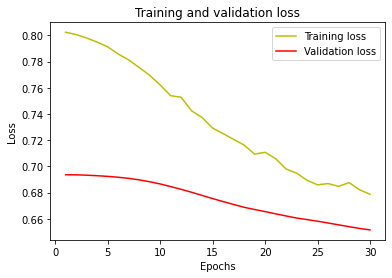

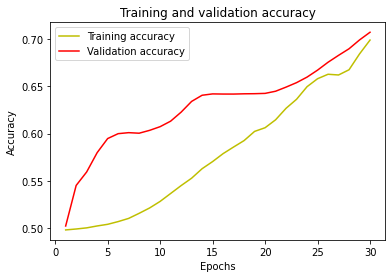

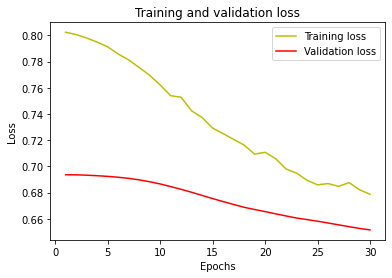

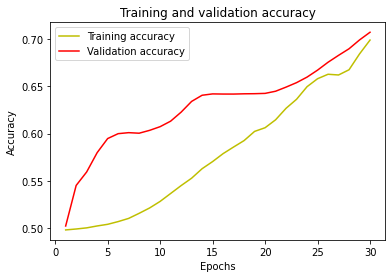

In [ ]:
import matplotlib.pyplot as plt

history  = hist
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

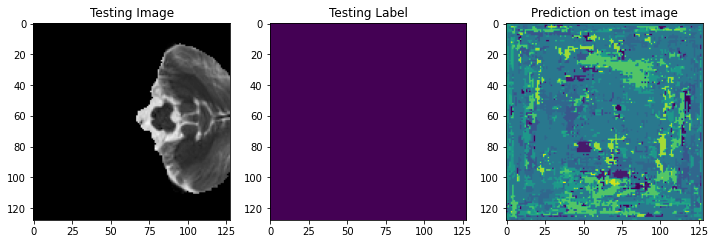

In [ ]:
img_num = 82

#test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")
test_img = np.load("/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/SplitData/train/images/image_55.npy")
test_img = test_img[:,:,0:16]


test_mask = np.load("/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/SplitData/train/masks/mask_55.npy")
test_mask = test_mask[:,:,0:16]
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=3)[0,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 8
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:])
plt.show()



In [ ]:
test_img = np.load("/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/SplitData/train/images/image_55.npy")
test_mask = np.load("/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/SplitData/train/masks/mask_55.npy")
test_img.shape, test_mask.shape

((128, 128, 128), (128, 128, 128, 4))